In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/data.csv")

In [ ]:
# Drop the 'Unnamed: 32' column
df = df.drop(columns=['Unnamed: 32'])

# Print the description
print(df.describe().T)


                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#Renaming dataset to label to make it easy to understand


In [ ]:
df= df.rename(columns={'diagnosis':'Label1'})
print(df.dtypes)

id                           int64
Label1                      object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

#Understanding the data
M-malignant B-benign

<ipython-input-30-2aa377a77ea2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label1",data=df,palette=colors)


<Axes: xlabel='Label1', ylabel='count'>

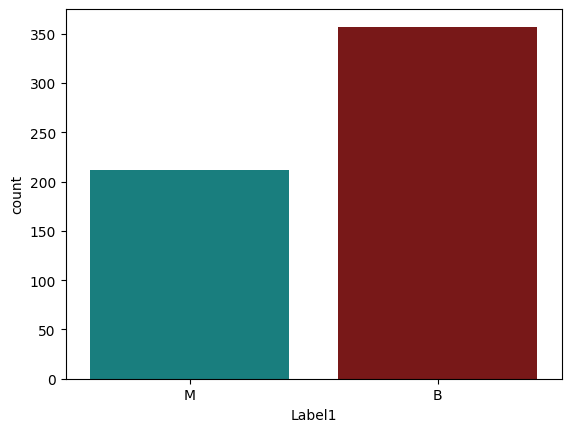

In [ ]:
colors=['#088F8F','#880808']
sns.countplot(x="Label1",data=df,palette=colors)

#replacing categorical values with numbers

In [ ]:
print("Distribution of data:",df['Label1'].value_counts())

Distribution of data: B    357
M    212
Name: Label1, dtype: int64


In [ ]:
#defining the dependent variable that needs to be predicted(labels)
y=df['Label1'].values
print("Labels before encoding are: ",np.unique(y))


Labels before encoding are:  ['B' 'M']


In [ ]:
###changing categorical data text(M,B) to integers(0,1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y= labelencoder.fit_transform(y) #M=1 and B=0
print("Labels after encoding are: ",np.unique(Y))

Labels after encoding are:  [0 1]


#defining X and normalizing/ scale values

In [ ]:
#define the independant variable .drop label and id and normalize other data
X = df.drop(labels=['Label1','id'],axis = 1)
print(X.describe().T) #scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

#scale / normalize the values to bring them to similar range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


#spliting data into training and testing to verify accuracy after fitting the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, Y , test_size=0.25,random_state=42)
print("Shape of the training data is: ",x_train.shape)
print("Shape of the testing data is: ",x_test.shape)

Shape of the training data is:  (426, 30)
Shape of the testing data is:  (143, 30)


#deeplearing using keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

#defining the model

In [ ]:
model = Sequential() #makes it easy to add layers
model.add(Dense(16,input_dim=30,activation="relu"))
model.add(Dropout(0.2)) # droping 20% randomly
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam',metrics= ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


#fitting the model

In [ ]:
history = model.fit(x_train, y_train,verbose=1,epochs=100,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 60ms/step - loss: 0.6971 - accuracy: 0.5399 - val_loss: 0.6813 - val_accuracy: 0.6503
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.5986 - val_loss: 0.6694 - val_accuracy: 0.6993
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6479 - val_loss: 0.6575 - val_accuracy: 0.7413
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6680 - accuracy: 0.6244 - val_loss: 0.6451 - val_accuracy: 0.7902
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6481 - accuracy: 0.6878 - val_loss: 0.6331 - val_accuracy: 0.7972
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6401 - accuracy: 0.7207 - val_loss: 0.6205 - val_accuracy: 0.8252
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6283 - accuracy: 0.7324 - val_loss: 0.6073 - val_accuracy: 0.8462
Epoch 8/100
7/7 [=======

#plotting the traing and validation accuracy and loss at  each epoc

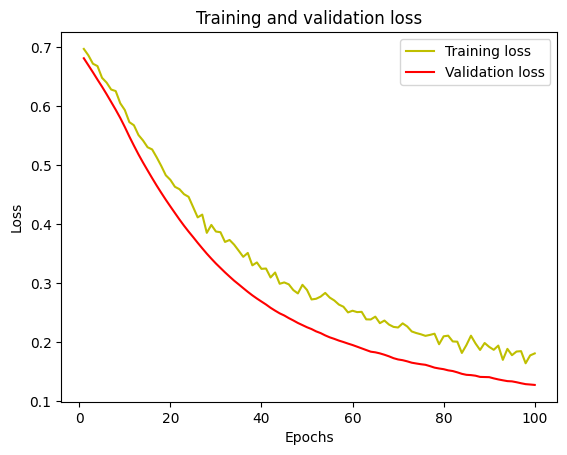

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss,'r', label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

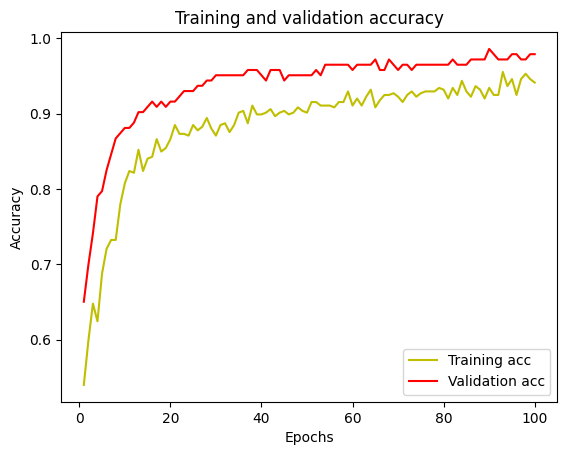

[0.6503496766090393, 0.6993007063865662, 0.7412587404251099, 0.7902097702026367, 0.7972028255462646, 0.8251748085021973, 0.8461538553237915, 0.867132842540741, 0.8741258978843689, 0.881118893623352, 0.881118893623352, 0.8881118893623352, 0.9020978808403015, 0.9020978808403015, 0.9090909361839294, 0.9160839319229126, 0.9090909361839294, 0.9160839319229126, 0.9090909361839294, 0.9160839319229126, 0.9160839319229126, 0.9230769276618958, 0.9300699234008789, 0.9300699234008789, 0.9300699234008789, 0.9370629191398621, 0.9370629191398621, 0.9440559148788452, 0.9440559148788452, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9580419659614563, 0.9580419659614563, 0.9580419659614563, 0.9510489702224731, 0.9440559148788452, 0.9580419659614563, 0.9580419659614563, 0.9580419659614563, 0.9440559148788452, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.9510489702224731, 0.

In [ ]:
acc = history.history['accuracy'] #using accuracy if acc doesnt work
val_acc = history.history['val_accuracy'] # if acc doesnt work
plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs,val_acc,'r', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




#Predicting the test set

5/5 [==============================] - 0s 2ms/step


<Axes: >

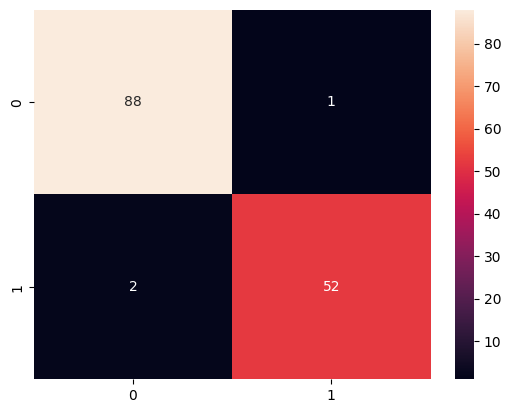

In [ ]:
y_predict = model.predict(x_test)
y_predict = (y_predict > 0.5)

#confusio8un matrix
from sklearn.metrics import confusion_matrix
conm = confusion_matrix(y_test,y_predict)

sns.heatmap(conm, annot = True)

In [ ]:
final_training_acc = acc[-1]
final_validation_acc = val_acc[-1]

print("Final Training Accuracy:", final_training_acc*100)
print("Final Validation Accuracy:", final_validation_acc*100)


Final Training Accuracy: 94.13145780563354
Final Validation Accuracy: 97.90209531784058
